# Question 2

#### Consider Bayesian estimation of mean on one-dimensional Gaussian dataset 3. Suppose prior of the mean is P(μ) ∼ N (μ0 , σ0 ).

#### (a) Estimate σ by assuming that μ 0 = −1.

In [1]:
# Importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
data = pd.read_csv('/home/achusanjeev/7_CH16B033_CH16B113/Dataset_3_Team_71.csv')

In [3]:
data.columns = ['x']
data.head(5)

,x
0,1.802781
1,2.638519
2,-0.343801
3,2.883387
4,1.277693


We are performing mean estimation with D_100 = data. In the bayesian estimation of mean, equating the coefficients of mu and mu^2, we get the following 

1/(sigma_n)^2 = (n/sigma^2) + 1/(sigma_0)^2                                  ----(1)

mu_n/(sigma_n)^2 = (n/sigma^2)* S_n/n + mu_0/(sigma_0)^2               ----(2) 
 
Let alpha = (sigma/sigma_0)^2

Note that in assignment, mu refers to mean and sigma refers to standard deviation

In [4]:
mu_0 = -1

In [5]:
alpha_set = [0.1,1,10,100]
S_n = data['x'].sum()
n =len(data['x'])

# To calculate mu_100, we use equation (2)
mu_set = []
for alpha in alpha_set:
    mu_n = 1/(n+alpha) * S_n + alpha/(n+alpha) * mu_0
    mu_set.append(mu_n)

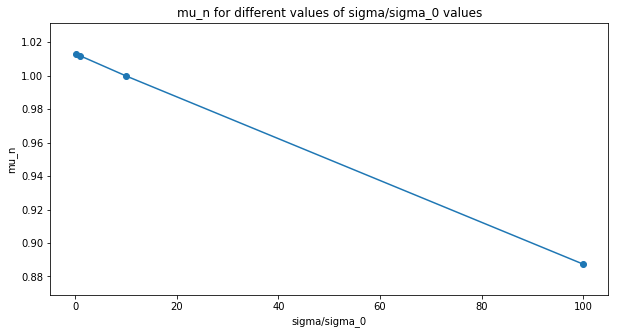

In [6]:
# Plotting mu_n vs sigma/sigma_0 values

plt.figure(figsize = [10,5])
plt.scatter(alpha_set, mu_set)
plt.plot(alpha_set, mu_set)
plt.title('mu_n for different values of sigma/sigma_0 values')
plt.xlabel('sigma/sigma_0')
plt.ylabel('mu_n')
plt.show()

In [7]:
# To calculate sigma_n, we have to calculate the value of sigma from the given data

sigma = (np.var(data)['x'])**0.5
print('The sample variance is {}'.format(sigma))

The sample variance is 1.9657677201045032


In [8]:
sigma_set = []

# To calculate sigma_n, we use equation (1)

for alpha in alpha_set:
    
    sigma_0 = (sigma**2/alpha)**0.5
    sigma_n = 1/((n/sigma**2) + 1/(sigma_0)**2)**0.5
    sigma_set.append(sigma_n)

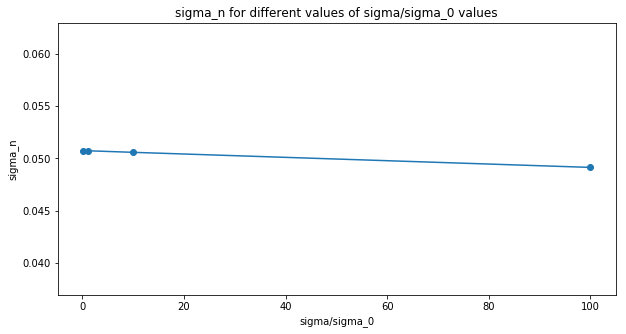

In [9]:
# Plotting sigma_n vs sigma/sigma_0 values

plt.figure(figsize = [10,5])
plt.scatter(alpha_set, sigma_set)
plt.plot(alpha_set, sigma_set)
plt.title('sigma_n for different values of sigma/sigma_0 values')
plt.xlabel('sigma/sigma_0')
plt.ylabel('sigma_n')
plt.show()

In [10]:
# Tabulating the resutls
mu_set1 = ['mu_n'] + mu_set
sigma_set1 = ['sigma_n'] + sigma_set
alpha_set1 = ['sigma/sigma_0'] + alpha_set

print('The posterior mean and standard deviation are\n')
print(tabulate([sigma_set1, mu_set1],headers = alpha_set1,tablefmt='fancy_grid'))

The posterior mean and standard deviation are

╒═════════════════╤═══════════╤══════════╤═══════════╤═══════════╕
│ sigma/sigma_0   │       0.1 │        1 │        10 │       100 │
╞═════════════════╪═══════════╪══════════╪═══════════╪═══════════╡
│ sigma_n         │ 0.0507542 │ 0.050739 │ 0.0505876 │ 0.0491442 │
├─────────────────┼───────────┼──────────┼───────────┼───────────┤
│ mu_n            │ 1.01309   │ 1.01188  │ 0.999887  │ 0.887393  │
╘═════════════════╧═══════════╧══════════╧═══════════╧═══════════╛


#### (b) Plot your estimated densities P(x/D) for n = 10, 100, 1000 with the following rates for σ^2 /σ0^2 = 0.1, 1, 10, 100.

In [11]:
# Creating n_set and alpha_set corresponding to the values of n and (sigma/sigma_0)^2 given in the question
n_set = [10,100,1000]
alpha_set = [0.1,1,10,100]

mu_matrix = np.zeros([len(n_set),len(alpha_set)])
sigma_matrix = np.zeros([len(n_set),len(alpha_set)])

In [12]:
# Calculating mu_n and sigma_n for each set of n and alpha using equations (1) and (2):

for i in range(len(n_set)):
    for j in range(len(alpha_set)):
        n = np.random.randint(0,1499,n_set[i])
        x = data['x'][n]
        S_n = sum(x)
        
        mu_n = 1/(n_set[i] +alpha_set[j])*S_n + alpha_set[j]/(n_set[i]+alpha_set[j])*mu_0 # (2)
        mu_matrix[i,j] = mu_n
        
        sigma_0 = (sigma**2/alpha_set[j])**0.5 # Since alpha = (sigma/sigma_0)^2
        sigma_n = 1/((n_set[i]/sigma**2) + 1/(sigma_0)**2)**0.5 # (1)
        sigma_matrix[i,j] = sigma_n

In [13]:
mu_matrix

array([[ 0.77320181,  1.44505749, -0.31624374, -0.83136231],
       [ 0.85810839,  0.7672564 ,  0.71655522,  0.09879812],
       [ 1.01294636,  0.94852109,  1.01367172,  0.85337585]])

In [14]:
sigma_matrix

array([[0.6185453 , 0.59270127, 0.43955903, 0.1874286 ],
       [0.19647856, 0.1956012 , 0.1874286 , 0.13900077],
       [0.06215993, 0.06213198, 0.06185453, 0.05927013]])

In [15]:
# Tabulating the results
print('σn values for different n and alpha')
sigma_matrix1 = np.hstack([[['n = 10'],['n = 100'],['n = 1000']],sigma_matrix])
print(tabulate(sigma_matrix1,tablefmt='fancy_grid',headers=['σ^2 /σ0^2','0.1','1','10','100']))

σn values for different n and alpha
╒═════════════╤═══════════╤══════════╤═══════════╤═══════════╕
│ σ^2 /σ0^2   │       0.1 │        1 │        10 │       100 │
╞═════════════╪═══════════╪══════════╪═══════════╪═══════════╡
│ n = 10      │ 0.618545  │ 0.592701 │ 0.439559  │ 0.187429  │
├─────────────┼───────────┼──────────┼───────────┼───────────┤
│ n = 100     │ 0.196479  │ 0.195601 │ 0.187429  │ 0.139001  │
├─────────────┼───────────┼──────────┼───────────┼───────────┤
│ n = 1000    │ 0.0621599 │ 0.062132 │ 0.0618545 │ 0.0592701 │
╘═════════════╧═══════════╧══════════╧═══════════╧═══════════╛


In [16]:
# Tabulating the results
print('μn values for different n and alpha')
mu_matrix1 = np.hstack([[['n = 10'],['n = 100'],['n = 1000']],mu_matrix])
print(tabulate(mu_matrix1,tablefmt='fancy_grid',headers=['σ^2 /σ0^2','0.1','1','10','100']))

μn values for different n and alpha
╒═════════════╤══════════╤══════════╤═══════════╤════════════╕
│ σ^2 /σ0^2   │      0.1 │        1 │        10 │        100 │
╞═════════════╪══════════╪══════════╪═══════════╪════════════╡
│ n = 10      │ 0.773202 │ 1.44506  │ -0.316244 │ -0.831362  │
├─────────────┼──────────┼──────────┼───────────┼────────────┤
│ n = 100     │ 0.858108 │ 0.767256 │  0.716555 │  0.0987981 │
├─────────────┼──────────┼──────────┼───────────┼────────────┤
│ n = 1000    │ 1.01295  │ 0.948521 │  1.01367  │  0.853376  │
╘═════════════╧══════════╧══════════╧═══════════╧════════════╛


p(x|D) is given by p(x|D) = N(μn , σ^2 + σn^2 )

Hence, p(x|D) is a normal distribution with mean μn and variance σ^2 + σn^2

In [17]:
# Variance of p(x/D) has variance σ^2 + σn^2
variance_matrix = sigma_matrix**2 + sigma**2*np.ones([3,4])

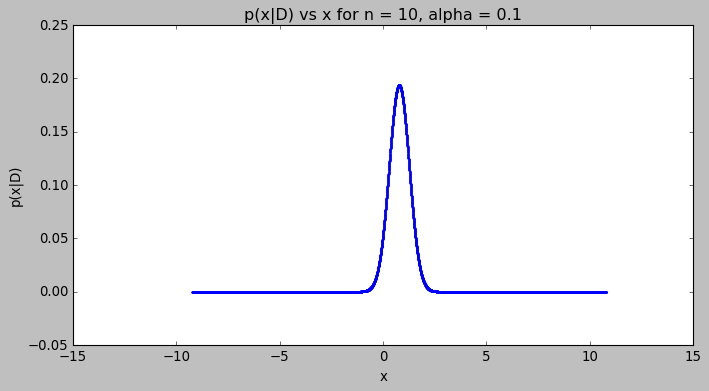

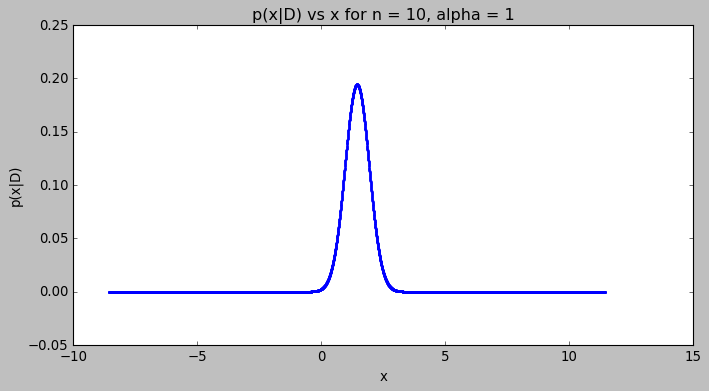

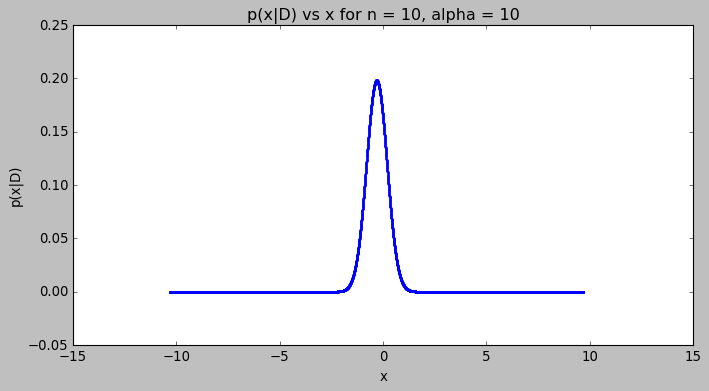

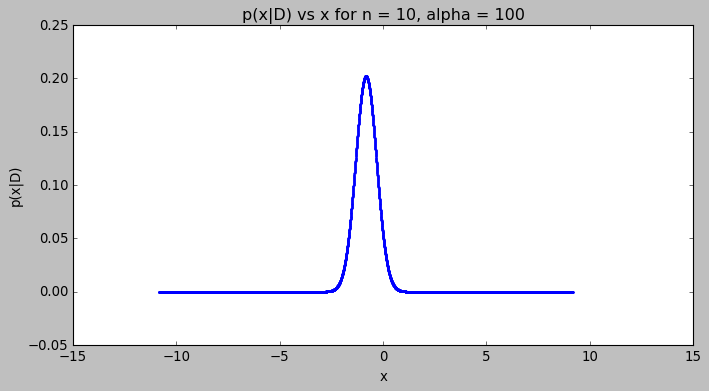

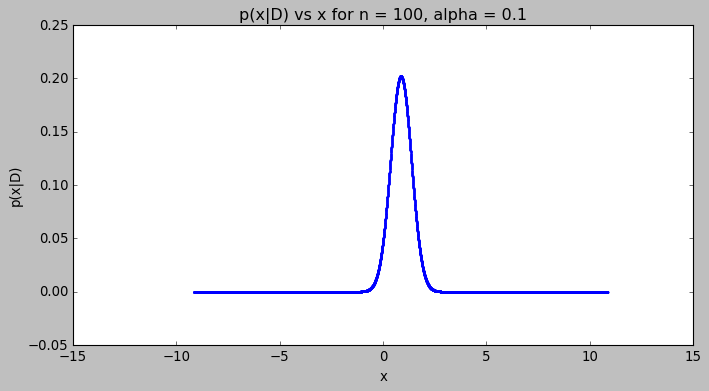

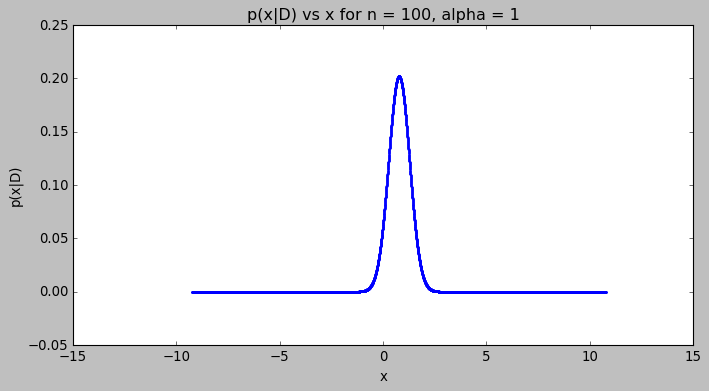

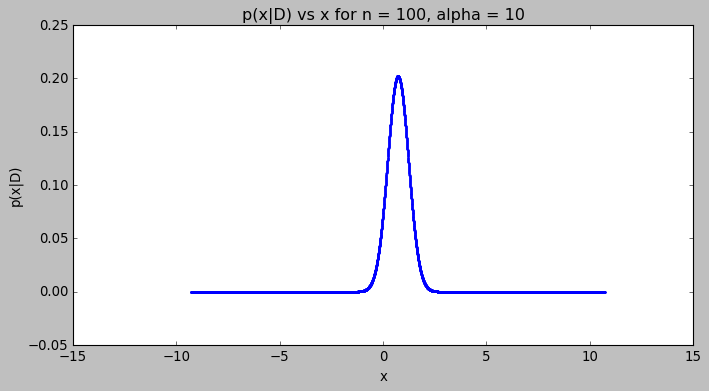

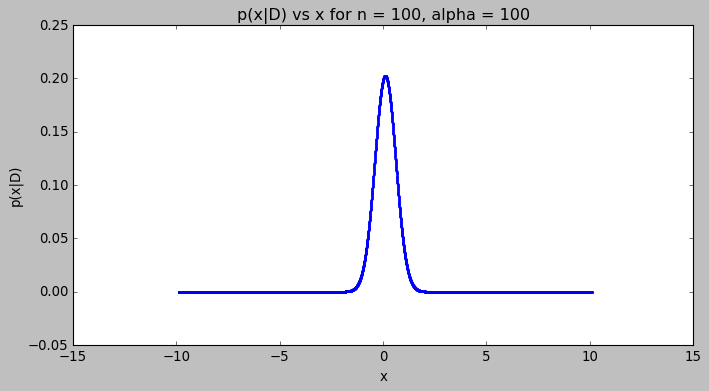

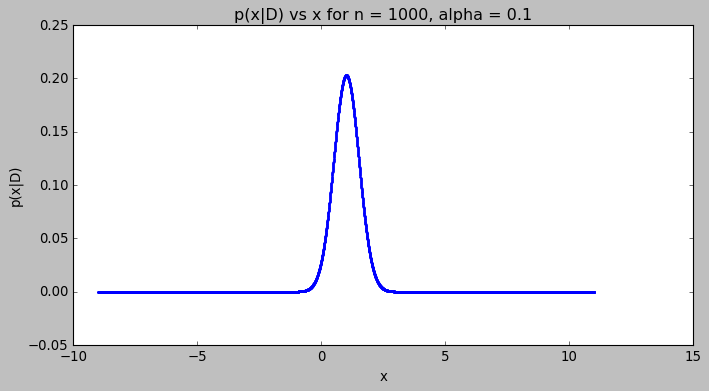

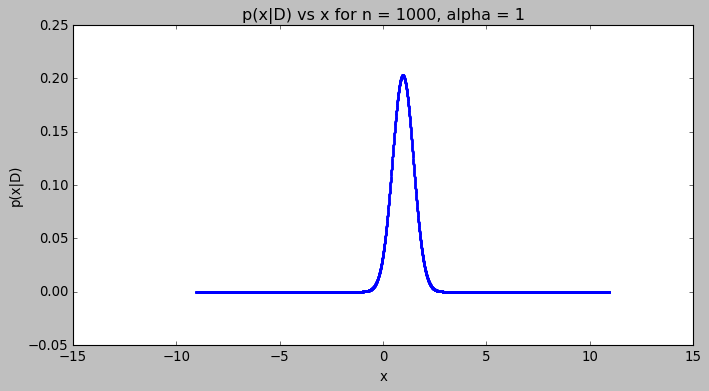

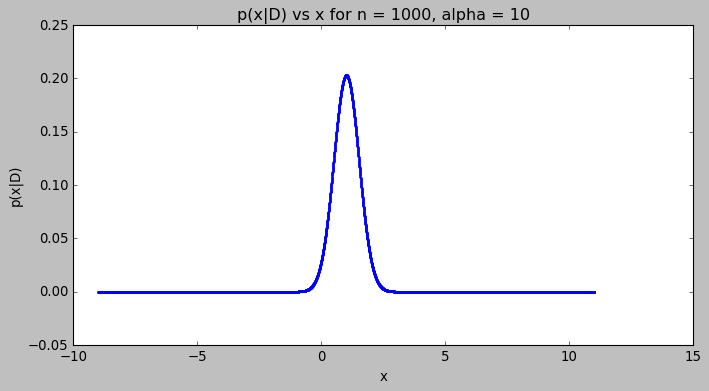

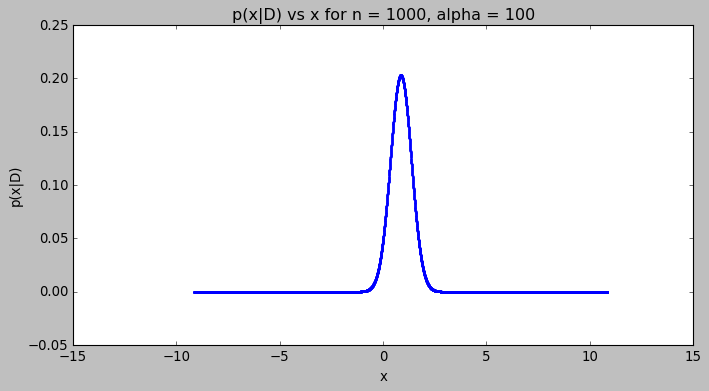

In [20]:
# Plotting p(x/D) vs x
for i in range(len(n_set)):
    for j in range(len(alpha_set)):
        sigma_plot = (variance_matrix[i,j])**0.5
        mu_plot = mu_matrix[i,j]
        
        x_plot = np.linspace(mu_plot-10,mu_plot+10,10000) # Generating x for plotting
        y = 1/(2*np.pi*sigma_plot**2)**0.5 * (np.exp(-(x_plot-mu_plot)**2/2*sigma_plot**2)) # Normal Distribution
        plt.figure(figsize=[10,5])
        plt.style.use('classic')
        plt.title('p(x|D) vs x for n = {}, alpha = {}'.format(n_set[i],alpha_set[j]))
        plt.scatter(x_plot,y,s=1,color='blue')
        plt.xlabel('x')
        plt.ylabel('p(x|D)')
        plt.show()